# Exploratory Data Analysis (EDA)

This notebook continues the project using the cleaned dataset.

**Goals:**
- Examine the structure and distribution of key features.
- Identify and handle outliers using IQR and standard deviation.
- Compute and interpret statistical metrics (mean, median, IQR, etc.).
- Analyze relationships through cross-tabulations, scatter plots, and heatmaps.
- Investigate trends in job satisfaction, remote work, compensation, and programming preferences.

Dataset used: `Cleaned_dataset.csv`


We Now import the Pandas module

In [47]:
# Import library
import pandas as pd

Then, we load Dataset into a DataFrame and Display Initial Few rows

In [37]:
#Read the Csv file
df = pd.read_csv("Cleaned_dataset.csv")

#Display First 5 rows
df.head()

,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,...,ProfessionalCloud,ProfessionalQuestion,Industry,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_MinMax,ConvertedCompYearly_Zscore,CompTotal_Zscore
0,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,3,...,Hybrid (on-prem and cloud),AI-powered search (free),Software Development,Too long,Easy,7322.0,10.0,0.000450,-0.422117,-0.038644
1,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,NaN,12,...,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN,0.001850,-0.300290,-0.102475
2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,API document(s) and/or SDK document(s),15,...,On-prem,AI-powered search (paid),Computer Systems Design and Services,Too long,Difficult,91295.0,10.0,0.005616,0.027521,-0.100667
3,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);First-p...,27,...,NaN,NaN,NaN,Too short,Easy,53703.0,NaN,0.003303,-0.173767,-0.101777
4,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,NaN,7,...,Cloud only (single or multi-cloud),AI-powered search (free),"Transportation, or Supply Chain",Too long,Easy,110000.0,10.0,0.006766,0.127678,-0.099874


## Understand Dataset Structure

In this step, we examine the structure of the cleaned dataset. This includes:
- Displaying column names and data types.
- Viewing the number of rows and columns.
- Generating summary statistics for numerical columns.


In [38]:
#Display Column datatypes
print("\nColumn Data Types:\n")
print(df.dtypes)

#Display Column names
print("\nColumn Names:\n")
print(df.columns)


Column Data Types:

MainBranch                     object
Age                            object
Employment                     object
RemoteWork                     object
CodingActivities               object
                               ...   
ConvertedCompYearly           float64
JobSat                        float64
ConvertedCompYearly_MinMax    float64
ConvertedCompYearly_Zscore    float64
CompTotal_Zscore              float64
Length: 106, dtype: object

Column Names:

Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'CodingActivities',
       'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode',
       ...
       'ProfessionalCloud', 'ProfessionalQuestion', 'Industry', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly', 'JobSat',
       'ConvertedCompYearly_MinMax', 'ConvertedCompYearly_Zscore',
       'CompTotal_Zscore'],
      dtype='object', length=106)


In [39]:
#Display the Shape of the Dataset
print("\nShape:\n", df.shape)




Shape:
 (23113, 106)


In [41]:
#Display the Summary Statistics of the data
print("\nSummary Statistics:\n")
df.describe()


Summary Statistics:



,CompTotal,WorkExp,ConvertedCompYearly,JobSat,ConvertedCompYearly_MinMax,ConvertedCompYearly_Zscore,CompTotal_Zscore
count,2.311300e+04,15911.000000,23113.000000,15841.000000,23113.000000,23113.000000,23113.000000
mean,9.946157e+05,11.145245,80497.643534,6.911937,0.004952,-0.030294,-0.071809
std,5.308351e+06,8.905543,69472.343312,2.106450,0.004273,0.371993,0.168408
min,1.000000e+00,0.000000,1.000000,0.000000,0.000000,-0.461318,-0.103363
25%,5.700000e+04,4.000000,33296.000000,6.000000,0.002048,-0.283038,-0.101555
50%,1.050000e+05,9.000000,65000.000000,7.000000,0.003998,-0.113277,-0.100032
75%,2.400000e+05,15.000000,107406.000000,8.000000,0.006607,0.113788,-0.095749
max,9.600000e+07,50.000000,644437.000000,10.000000,0.039641,2.989349,2.942252


We plot the distribution curve for the column ConvertedCompYearly.

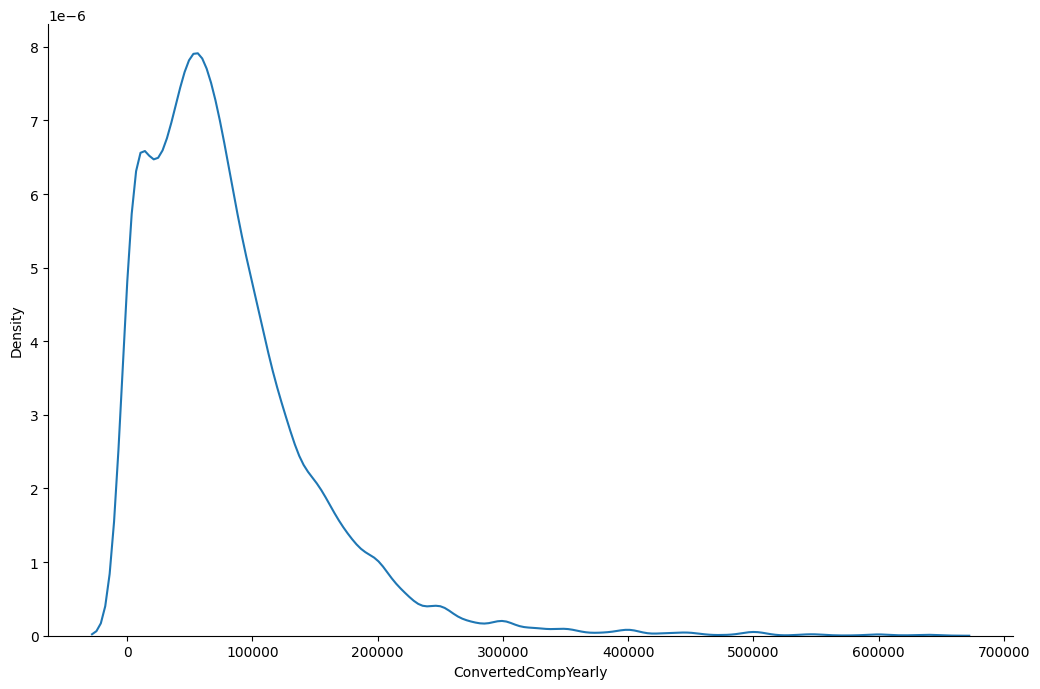

In [48]:
#Import the necessary Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Plot the Distribution graph
sns.displot(df['ConvertedCompYearly'], kind="kde", height=7, aspect = 1.5)

We plot the histogram for the column ConvertedCompYearly.

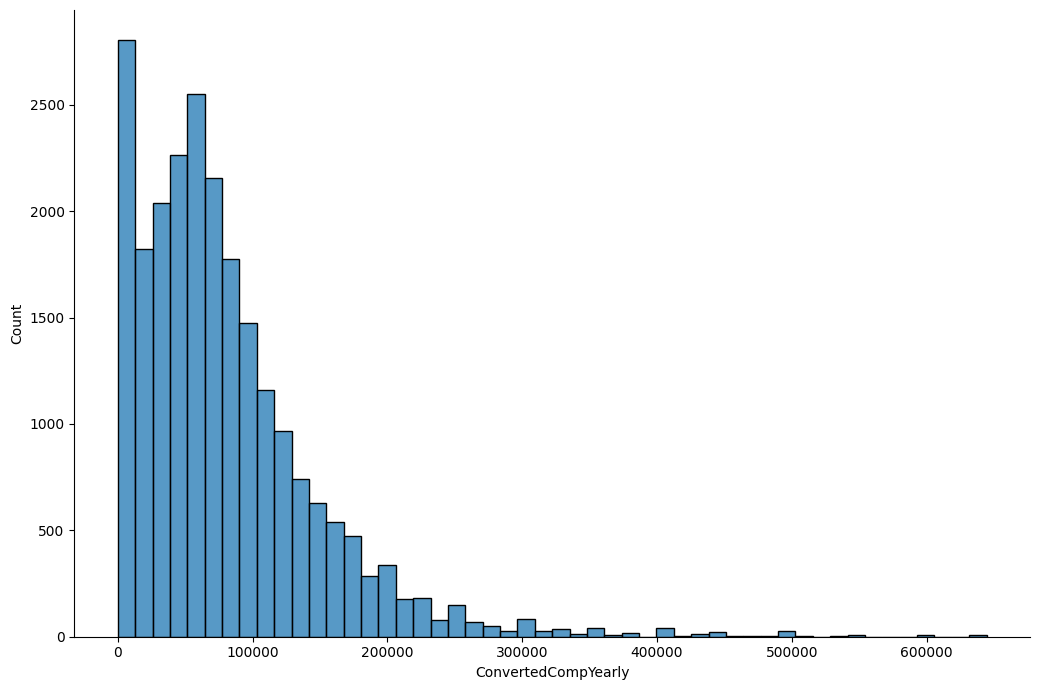

In [50]:
sns.displot(df["ConvertedCompYearly"], bins=50, height=7, aspect=1.5)

What is the median of the column ConvertedCompYearly?



In [51]:
df["ConvertedCompYearly"].describe()

count     23113.000000
mean      80497.643534
std       69472.343312
min           1.000000
25%       33296.000000
50%       65000.000000
75%      107406.000000
max      644437.000000
Name: ConvertedCompYearly, dtype: float64

We can see the median is 65000 as it is equal to the 50th percentile

## Finding Outliers

We find out if outliers exist in the column ConvertedCompYearly using a box plot

<Axes: xlabel='ConvertedCompYearly'>

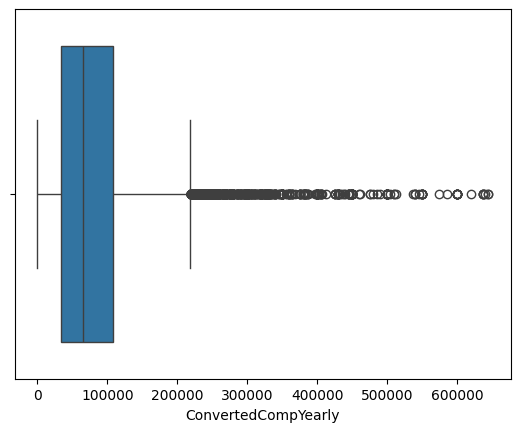

In [56]:
sns.boxplot(data= df["ConvertedCompYearly"], orient = "h")

We can find out the Inter Quartile Range for the column ConvertedCompYearly.

In [57]:
q1 = df['ConvertedCompYearly'].quantile(0.25)
q3 = df['ConvertedCompYearly'].quantile(0.75)

print('Q1', q1)
print('Q3', q3)

IQR = q3 - q1
print('IQR', IQR)

Q1 33296.0
Q3 107406.0
IQR 74110.0


We find out the upper and lower bounds.

In [58]:
up_bound = q3 + IQR*1.5
print('Upper bound:', up_bound)

lw_bound = q1 - IQR*1.5
print('Lower bound:', lw_bound)

Upper bound: 218571.0
Lower bound: -77869.0


With these calculations we are able to identify how many outliers are there in the ConvertedCompYearly column.

In [59]:
num_outliers = 0

for conv_comp in df['ConvertedCompYearly']:
    if (conv_comp < lw_bound) or (conv_comp > up_bound):
        num_outliers = num_outliers + 1

num_outliers

929

What is the median ConvertedCompYearly before removing outliers?

In [60]:
df['ConvertedCompYearly'].quantile(0.5)


65000.0

We now can create a new dataframe by removing the outliers from the ConvertedCompYearly column.

In [61]:
outl_index = df[(df.ConvertedCompYearly < lw_bound) | (df.ConvertedCompYearly > up_bound)].index

df_outl = df.drop(outl_index)
df_outl.shape

(22184, 106)

In [63]:
df_outl.describe()

,CompTotal,WorkExp,ConvertedCompYearly,JobSat,ConvertedCompYearly_MinMax,ConvertedCompYearly_Zscore,CompTotal_Zscore
count,2.218400e+04,15305.000000,22184.000000,15235.000000,22184.000000,22184.000000,22184.000000
mean,1.015774e+06,10.891669,71252.622656,6.898261,0.004383,-0.079797,-0.071138
std,5.404287e+06,8.794120,50761.021187,2.101849,0.003122,0.271803,0.171452
min,1.000000e+00,0.000000,1.000000,0.000000,0.000000,-0.461318,-0.103363
25%,5.500000e+04,4.000000,32222.000000,6.000000,0.001982,-0.288789,-0.101619
50%,1.000000e+05,8.000000,63694.000000,7.000000,0.003918,-0.120270,-0.100191
75%,2.000000e+05,15.000000,101000.000000,8.000000,0.006213,0.079487,-0.097018
max,9.600000e+07,50.000000,218400.000000,10.000000,0.013434,0.708111,2.942252


## Correlation Analysis

We now analyze how key numeric variables relate to one another, especially:

- **WorkExp** (Years of Experience)
- **JobSat** (Job Satisfaction)
- **ConvertedCompYearly** (Annual Compensation)

Understanding these correlations helps uncover potential relationships between experience, satisfaction, and income levels.


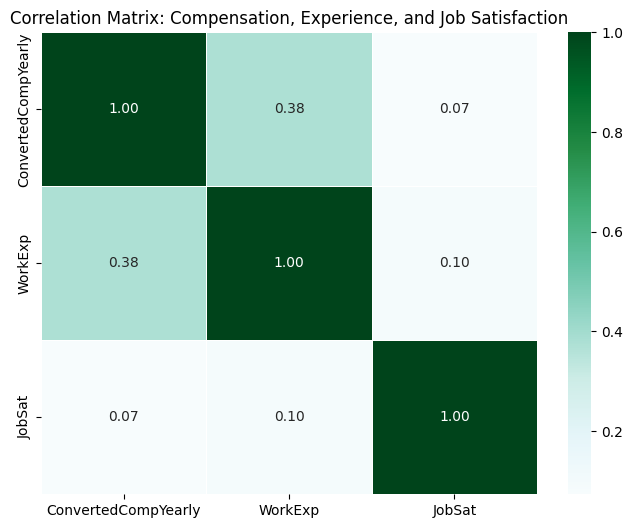

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
corr_cols = ['ConvertedCompYearly', 'WorkExp', 'JobSat']
corr_df = df[corr_cols].dropna()

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='BuGn', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Compensation, Experience, and Job Satisfaction')
plt.show()



### Programming Language Popularity by Country

We analyzed which programming languages are most commonly used by developers in the top 3 countries. After processing the language column and simplifying the dataset, we created a grouped bar chart showing the top 5 languages across these regions.

This helps us identify global trends (like Python dominance) and region-specific preferences.


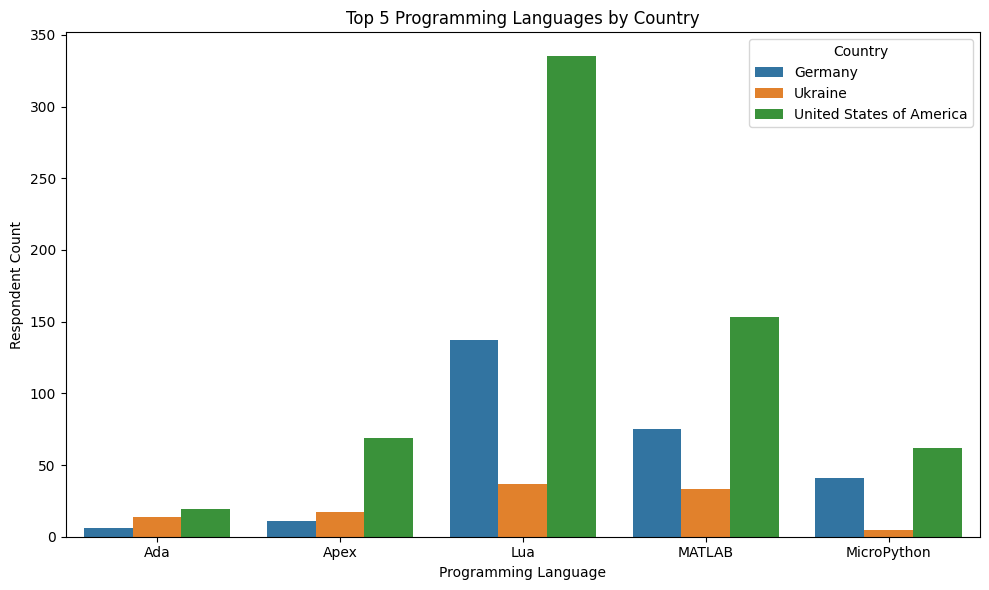

In [66]:
# Select top 3 countries by response count
top_countries = df['Country'].value_counts().head(3).index
df_lang = df[df['Country'].isin(top_countries)][['Country', 'LanguageHaveWorkedWith']].dropna()

# Split languages into lists
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')

# Explode the list so each language has its own row
df_lang = df_lang.explode('LanguageHaveWorkedWith')

# Group and count
lang_counts = df_lang.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

# Keep top 5 languages globally
top_langs = lang_counts['LanguageHaveWorkedWith'].value_counts().head(5).index
lang_counts = lang_counts[lang_counts['LanguageHaveWorkedWith'].isin(top_langs)]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=lang_counts, x='LanguageHaveWorkedWith', y='Count', hue='Country')
plt.title('Top 5 Programming Languages by Country')
plt.xlabel('Programming Language')
plt.ylabel('Respondent Count')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


### Remote Work Distribution by Country

We visualized how remote work preferences differ across the top 5 countries. The grouped bar chart shows the count of respondents preferring remote, hybrid, or in-person work in each region.

This helps in identifying which countries are more open to flexible work environments.


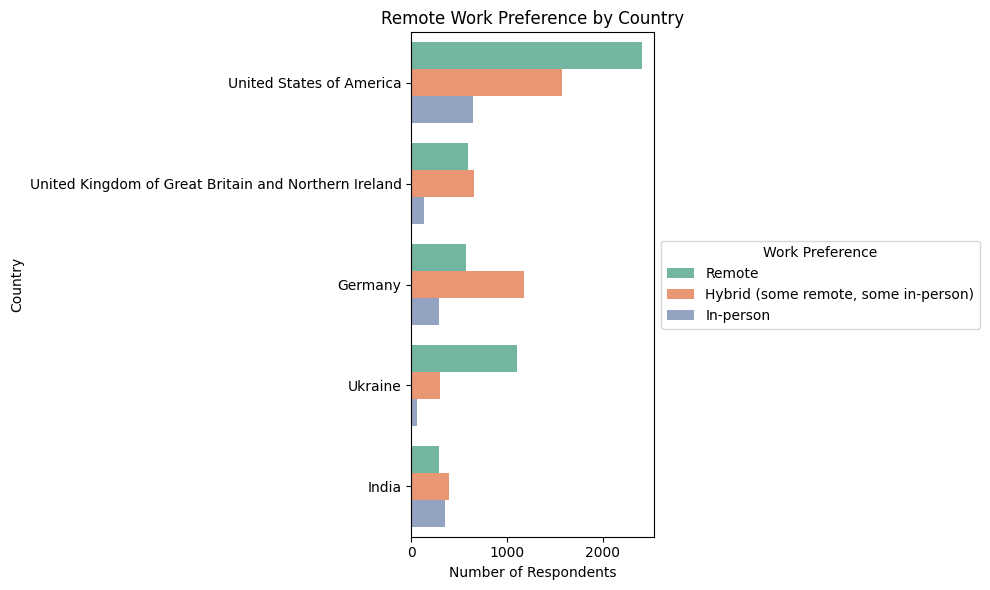

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
remote_df = df[['Country', 'RemoteWork']].dropna()
top_countries = remote_df['Country'].value_counts().head(5).index
remote_df = remote_df[remote_df['Country'].isin(top_countries)]

# Create count plot with Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=remote_df, y='Country', hue='RemoteWork', palette='Set2')

plt.title('Remote Work Preference by Country')
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.legend(title='Work Preference', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


### Analyze the Relationship Between Experience and Job Satisfaction

Now, We Explore how professional experience (WorkExp) correlates with job satisfaction (JobSat).

In [69]:
#Clean the columns
df_exp_sat = df[['WorkExp', 'JobSat']].dropna()

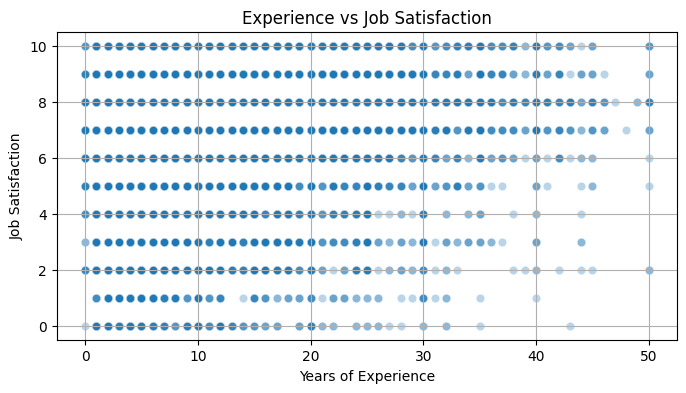

In [85]:
#Plot the Graph
plt.figure(figsize=(8,4))
sns.scatterplot(data=df_exp_sat, x='WorkExp', y='JobSat', alpha=0.3)
plt.title('Experience vs Job Satisfaction')
plt.xlabel('Years of Experience')
plt.ylabel('Job Satisfaction')
plt.grid(True)
plt.show()

We will check Correlation now

In [71]:
correlation = df_exp_sat.corr(numeric_only=True)
print("Correlation between Work Experience and Job Satisfaction:\n", correlation)


Correlation between Work Experience and Job Satisfaction:
           WorkExp    JobSat
WorkExp  1.000000  0.095337
JobSat   0.095337  1.000000


- The correlation is positive but very weak.

- This suggests that as Work Experience increases, Job Satisfaction tends to increase slightly, but the relationship is not strong.

## Remote Work Trends Analysis

### Distribution of Remote Work Preferences


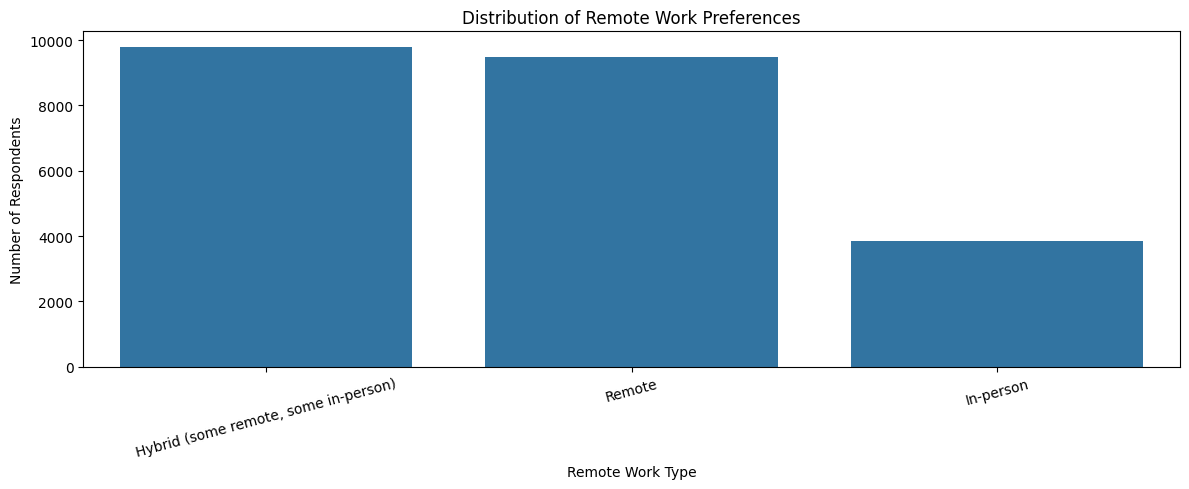

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5),)
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index)
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Type')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


This chart displays how respondents are distributed across different types of remote work setups, helping us understand the overall preference patterns.

### Remote Work Distribution by Region


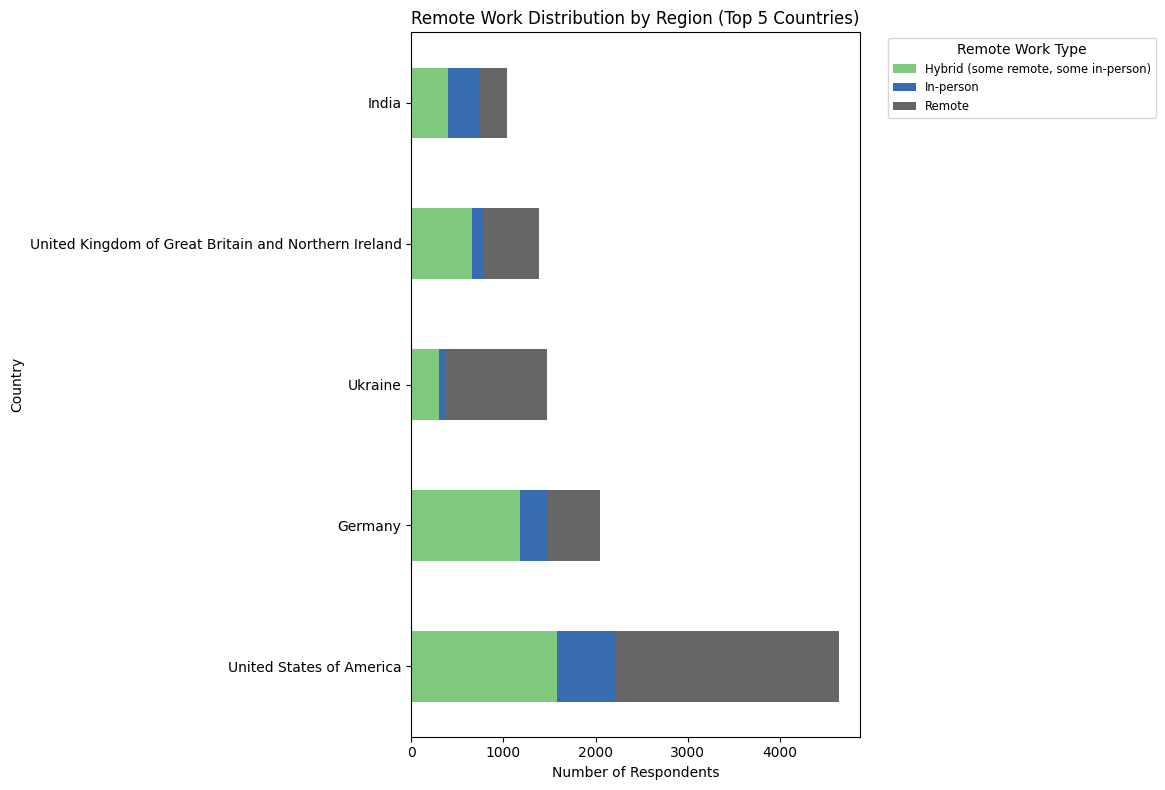

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of RemoteWork by Country
remote_region_counts = pd.crosstab(df['Country'], df['RemoteWork'])

# Sort by total responses for better readability
remote_region_counts = remote_region_counts.loc[remote_region_counts.sum(axis=1).sort_values(ascending=False).index]

# Plot
remote_region_counts.head().plot(kind='barh', stacked=True, figsize=(12, 8), colormap='Accent')
plt.title('Remote Work Distribution by Region (Top 5 Countries)')
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.legend(title='Remote Work Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()


This chart shows how remote work preferences differ across countries, offering insights into regional adoption of remote or hybrid work styles.

## Save the Datset into CSV file

In [95]:
# Save the final version of the DataFrame to a CSV file
df.to_csv("Final_Cleaned_EDA_Dataset.csv", index=False)
